#[STEP 1] 데이터 준비하기

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
df = pd.DataFrame(np.array([[26,900],[28, 600],[29,600],[30,800],
                            [35,1300],[36,1560],[37,1370],[38,1620],
                            [39,800],[40,650],[41,820],[42,625]]),
             columns=['Age', 'hour'])
df.head(5)

,Age,hour
0,26,900
1,28,600
2,29,600
3,30,800
4,35,1300


#[STEP 2] 첫 번째 학습하기

#① 모델 예측값 출력하기

In [34]:
kM_model = KMeans(n_clusters=3)
y_pred = kM_model.fit_predict(df[['Age','hour']])
df['cluster'] = y_pred
df.head(5)

,Age,hour,cluster
0,26,900,2
1,28,600,0
2,29,600,0
3,30,800,2
4,35,1300,1


# ② 첫 번째 학습된 결과 시각화하기

Text(0, 0.5, 'hour')

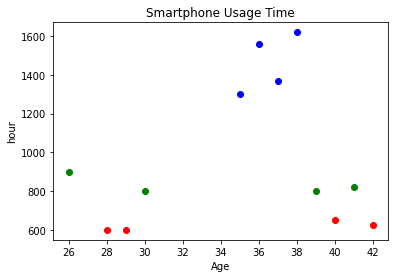

In [35]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Age'],df1['hour'],color='red')
plt.scatter(df2['Age'],df2['hour'],color='blue')
plt.scatter(df3['Age'],df3['hour'],color='green')

plt.title('Smartphone Usage Time')
plt.xlabel('Age')
plt.ylabel('hour')

##③ 첫 번째 학습된 결과 요약하기

In [36]:
df.describe()

,Age,hour,cluster
count,12.000000,12.000000,12.000000
mean,35.083333,970.416667,1.000000
std,5.484828,383.752159,0.852803
min,26.000000,600.000000,0.000000
25%,29.750000,643.750000,0.000000
50%,36.500000,810.000000,1.000000
75%,39.250000,1317.500000,2.000000
max,42.000000,1620.000000,2.000000


#[STEP 3] 정규화하기

##① 예측값 출력하기

In [37]:
scaler = MinMaxScaler()
scaler.fit(df[['hour']])
df['hour'] = scaler.transform(df[['hour']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head(5)

,Age,hour,cluster
0,0.0000,0.294118,2
1,0.1250,0.000000,0
2,0.1875,0.000000,0
3,0.2500,0.196078,2
4,0.5625,0.686275,1


#[STEP 4] 두 번째 학습하기

##① 모델 예측값 출력하기

In [44]:
kM_model = KMeans(n_clusters=3)
y_pred = kM_model.fit_predict(df[['Age','hour']])
df['cluster'] = y_pred
df.head(5)

,Age,hour,cluster
0,0.0000,0.294118,0
1,0.1250,0.000000,0
2,0.1875,0.000000,0
3,0.2500,0.196078,0
4,0.5625,0.686275,1


##② cluster의 중심값 출력하기

In [45]:
kM_model.cluster_centers_

array([[0.140625  , 0.12254902],
       [0.65625   , 0.84558824],
       [0.90625   , 0.12132353]])

##③ 두 번째 학습된 결과 시각화하기

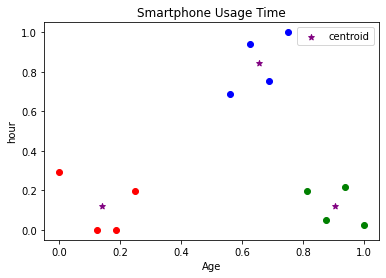

In [46]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['hour'],color='red')
plt.scatter(df2['Age'],df2['hour'],color='blue')
plt.scatter(df3['Age'],df3['hour'],color='green')

plt.scatter(kM_model.cluster_centers_[ :,0], kM_model.cluster_centers_[ :,1], 
            color='purple', marker='*',label='centroid')
plt.title('Smartphone Usage Time')
plt.xlabel('Age')
plt.ylabel('hour')
plt.legend()

#[STEP 5] 엘보 플롯(elbow plot) 그리기

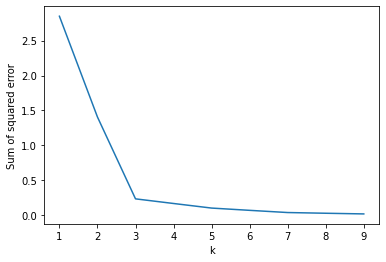

In [10]:
# elbow plot
k_range = range(1,10)
sse = []
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','hour']])
  sse.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)